# Code for TF-IDF by prompt/question for the generated responses from fine-tuned LLMs

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from collections import defaultdict

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nikiekstrom/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/nikiekstrom/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/nikiekstrom/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
# group data by party and time period
groups = [('democrat', '2016'), ('republican', '2016'), ('democrat', '1976'), ('republican', '1976')]
grouped_texts = {}

# read in data
debate_files = ['../experiment_2_data/dem_2016_results.csv', 
                '../experiment_2_data/rep_2016_results.csv', 
                '../experiment_2_data/dem_1976_results.csv', 
                '../experiment_2_data/rep_1976_results.csv']

dfs = [pd.read_csv(file) for file in debate_files]

In [3]:
dfs[0].head(20)

,Question,Model_Response
0,Why do you believe you are fit to be the next ...,I know how to do the job. I know how to get th...
1,What is your overarching vision for the country?,"Look, for 47 years, Ive worked with presidents..."
2,What is your plan to manage inflation and ensu...,Thats my plan. Thats his plan.
3,How will you create jobs and reduce unemployme...,And were going to create jobs and were going t...
4,What steps will you take to balance the federa...,"in the 10 years period of time, we will have a..."
5,How will you ensure that all Americans have ac...,And we will. And were going to make sure we ha...
6,How will your administration address the press...,But we have to deal with the environmental sus...
7,What are your top priorities in regards to for...,And we've got to strengthen our national defen...
8,What reforms would you propose to improve the ...,What would you do to reform education?
9,How will you restore trust in government and e...,I will restore trust and transparency.


In [4]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# preprocessing function
def preprocess(text):
    text = re.sub(r'[^a-z\s]', '', text.lower()) 
    return ' '.join(lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words)

# Group texts by (party, year, prompt) and preprocess
grouped_texts = defaultdict(list)
for df, (party, year) in zip(dfs, groups):
    for _, row in df.iterrows():
        prompt = row['Question']
        response = preprocess(row['Model_Response'])
        grouped_texts[(party, year, prompt)].append(response)

grouped_texts_combined = {
    key: " ".join(responses) for key, responses in grouped_texts.items()
}

group_labels = list(grouped_texts_combined.keys())
group_texts = list(grouped_texts_combined.values())


In [5]:
vectorizer = TfidfVectorizer(max_features=1000) 
tfidf_matrix = vectorizer.fit_transform(group_texts)

# calculate TF-IDF scores
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), index=group_labels, columns=vectorizer.get_feature_names_out())

multi_index = pd.MultiIndex.from_tuples(group_labels, names=["Party", "Year", "Prompt"])

# make index (Party, Year, Prompt)
tfidf_df.index = multi_index

In [6]:
tfidf_df.head()

able  \
Party    Year Prompt                                                         
democrat 2016 Why do you believe you are fit to be the next l...  0.047799   
              What is your overarching vision for the country?    0.046137   
              What is your plan to manage inflation and ensur...  0.037012   
              How will you create jobs and reduce unemploymen...  0.031318   
              What steps will you take to balance the federal...  0.000000   

                                                                  absolutely  \
Party    Year Prompt                                                           
democrat 2016 Why do you believe you are fit to be the next l...         0.0   
              What is your overarching vision for the country?           0.0   
              What is your plan to manage inflation and ensur...         0.0   
              How will you create jobs and reduce unemploymen...         0.0   
              What steps will you take to balance the federal...         0.0   

                                                                  access  \
Party    Year Prompt                                                       
democrat 2016 Why do you believe you are fit to be the next l...     0.0   
              What is your overarching vision for the country?       0.0   
              What is your plan to manage inflation and ensur...     0.0   
              How will you create jobs and reduce unemploymen...     0.0   
              What steps will you take to balance the federal...     0.0   

                                                                  accountable  \
Party    Year Prompt                                                            
democrat 2016 Why do you believe you are fit to be the next l...          0.0   
              What is your overarching vision for the country?            0.0   
              What is your plan to manage inflation and ensur...          0.0   
              How will you create jobs and reduce unemploymen...          0.0   
              What steps will you take to balance the federal...          0.0   

                                                                  achieve  \
Party    Year Prompt                                                        
democrat 2016 Why do you believe you are fit to be the next l...      0.0   
              What is your overarching vision for the country?        0.0   
              What is your plan to manage inflation and ensur...      0.0   
              How will you create jobs and reduce unemploymen...      0.0   
              What steps will you take to balance the federal...      0.0   

                                                                  achieved  \
Party    Year Prompt                                                         
democrat 2016 Why do you believe you are fit to be the next l...       0.0   
              What is your overarching vision for the country?         0.0   
              What is your plan to manage inflation and ensur...       0.0   
              How will you create jobs and reduce unemploymen...       0.0   
              What steps will you take to balance the federal...       0.0   

                                                                    across  \
Party    Year Prompt                                                         
democrat 2016 Why do you believe you are fit to be the next l...  0.000000   
              What is your overarching vision for the country?    0.000000   
              What is your plan to manage inflation and ensur...  0.000000   
              How will you create jobs and reduce unemploymen...  0.095289   
              What steps will you take to balance the federal...  0.000000   

                                                                  act  action  \
Party    Year Prompt                                                            
democrat 2016 Why do you believe you are fit to be the next l... 

In [7]:
num_top_words = 5
tfidf_df = tfidf_df.sort_index()

combinations = [
    ("democrat", 2016),
    ("republican", 2016),
    ("democrat", 1976),
    ("republican", 1976),
]

top_words_by_combination_and_question = {}

# iterate through unique party-year combinations
for party, year in combinations:
    filtered_df = tfidf_df.loc[(party, str(year)), :]
    
    # group by Prompt
    for question, group in filtered_df.groupby(level="Prompt"):
        # sum the TF-IDF scores for the group
        top_words = group.sum().sort_values(ascending=False).head(num_top_words)
        
        if (party, year) not in top_words_by_combination_and_question:
            top_words_by_combination_and_question[(party, year)] = {}
        top_words_by_combination_and_question[(party, year)][question] = top_words.to_dict()

questions_by_combination = {}

for (party, year), questions in top_words_by_combination_and_question.items():
    for question, words in questions.items():
        # group by question
        if question not in questions_by_combination:
            questions_by_combination[question] = {}
        questions_by_combination[question][(party, year)] = words

# Print the top 10 words for each (party, year) combination of each question
for question, party_year_data in questions_by_combination.items():
    print(f"\nQuestion: {question}")
    for (party, year), words in party_year_data.items():
        print(f"Top words for {party}, {year}:")
        for word, score in words.items():
            print(f"    {word}: {score:.2f}")


Question: How will you create jobs and reduce unemployment across the nation?
Top words for democrat, 2016:
    job: 0.55
    create: 0.52
    new: 0.22
    going: 0.21
    million: 0.20
Top words for republican, 2016:
    joe: 0.41
    job: 0.37
    closed: 0.21
    going: 0.20
    country: 0.19
Top words for democrat, 1976:
    uh: 0.44
    job: 0.36
    new: 0.20
    two: 0.17
    million: 0.17
Top words for republican, 1976:
    job: 0.56
    uh: 0.37
    people: 0.21
    program: 0.14
    industry: 0.14

Question: How will you ensure equal opportunities for marginalized communities in our country?
Top words for democrat, 2016:
    thank: 0.45
    equal: 0.45
    opportunity: 0.39
    lowest: 0.22
    sure: 0.20
Top words for republican, 2016:
    african: 0.39
    hispanic: 0.26
    american: 0.24
    lowest: 0.22
    community: 0.22
Top words for democrat, 1976:
    uh: 0.56
    black: 0.23
    minority: 0.23
    equal: 0.18
    opportunity: 0.16
Top words for republican, 1976:


In [ ]:
# For each question, print the shared and unique top-5 words
for question, party_year_data in questions_by_combination.items():
    # Initialize dictionaries and sets
    unique_phrases = {}
    shared_phrases = set()

    # Initialize shared_phrases with the top 5 words from the first party-year combination
    first_group = next(iter(party_year_data))
    top_5_words = sorted(party_year_data[first_group].items(), key=lambda x: x[1], reverse=True)[:5]
    shared_phrases = set([word for word, score in top_5_words])

    for group, words in party_year_data.items():
        # Get the top 5 words for the current group
        group_top_5 = sorted(words.items(), key=lambda x: x[1], reverse=True)[:5]
        group_phrases = set([word for word, score in group_top_5])

        # Update the shared_phrases to only include words that are present in all groups
        shared_phrases &= group_phrases

        # Get unique phrases for the current group
        other_phrases = set().union(
            *[set(party_year_data[other_group].keys()) for other_group in party_year_data if other_group != group]
        )
        unique_phrases[group] = group_phrases - other_phrases


    # Checking reusults
    print(f"\nShared Phrases Across All Groups for {question}:")
    print(shared_phrases)
    for group, phrases in unique_phrases.items():
        print(f"Unique Phrases for {group}:")
        print(sorted(list(phrases)))


Shared Phrases Across All Groups for How will you create jobs and reduce unemployment across the nation?:
{'job'}
Unique Phrases for ('democrat', 2016):
['create']
Unique Phrases for ('republican', 2016):
['closed', 'country', 'joe']
Unique Phrases for ('democrat', 1976):
['two']
Unique Phrases for ('republican', 1976):
['industry', 'people', 'program']

Shared Phrases Across All Groups for How will you ensure equal opportunities for marginalized communities in our country?:
set()
Unique Phrases for ('democrat', 2016):
['sure', 'thank']
Unique Phrases for ('republican', 2016):
['african', 'american', 'community', 'hispanic']
Unique Phrases for ('democrat', 1976):
[]
Unique Phrases for ('republican', 1976):
['department']

Shared Phrases Across All Groups for How will you ensure that all Americans have access to quality and affordable healthcare?:
set()
Unique Phrases for ('democrat', 2016):
['make', 'sure', 'way']
Unique Phrases for ('republican', 2016):
['access', 'much', 'youll']
Un

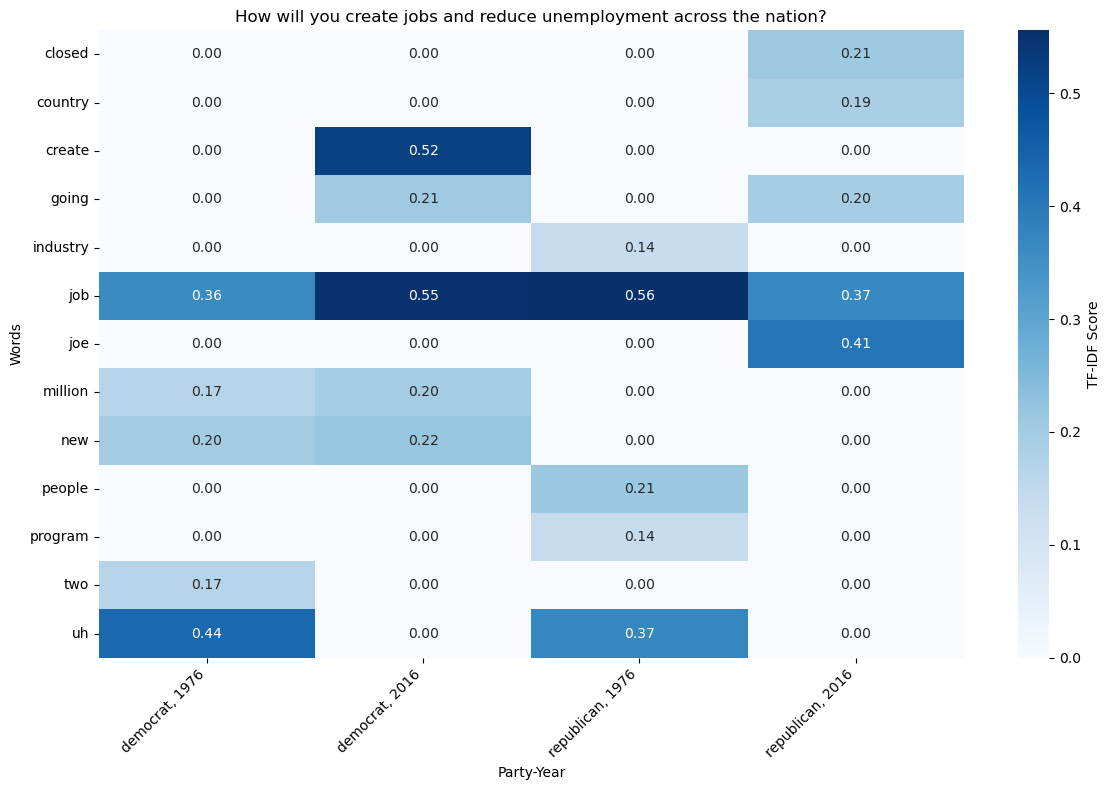

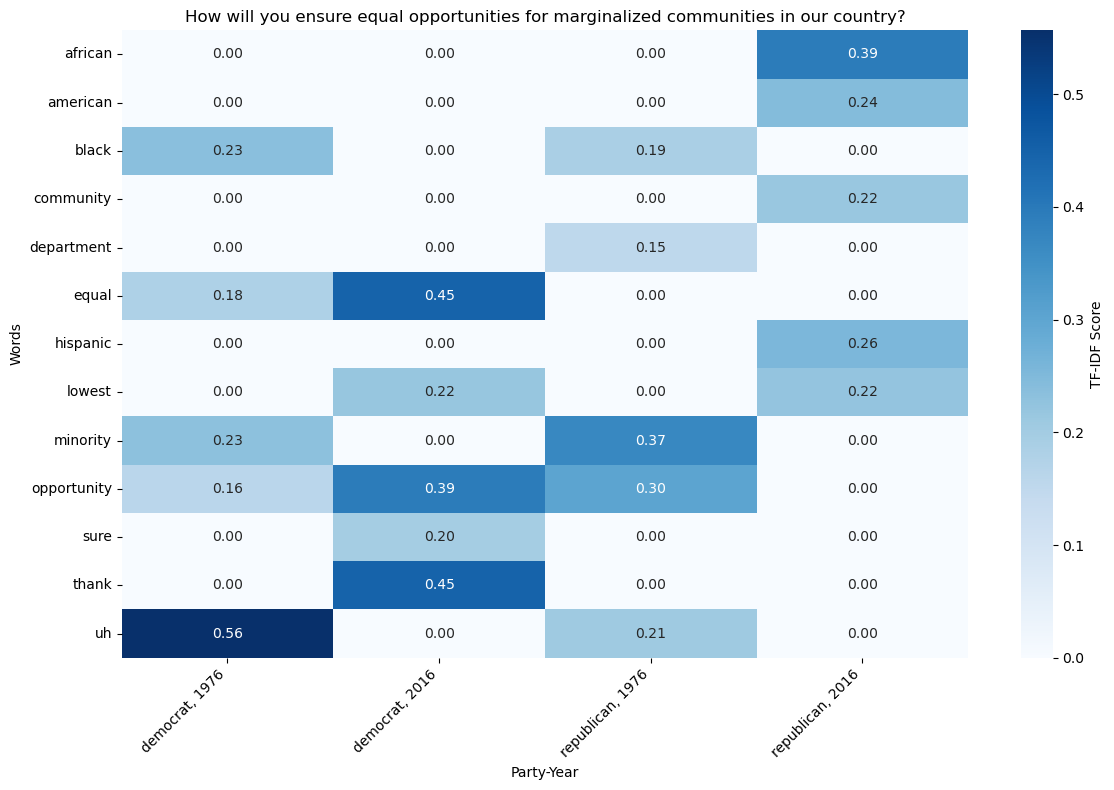

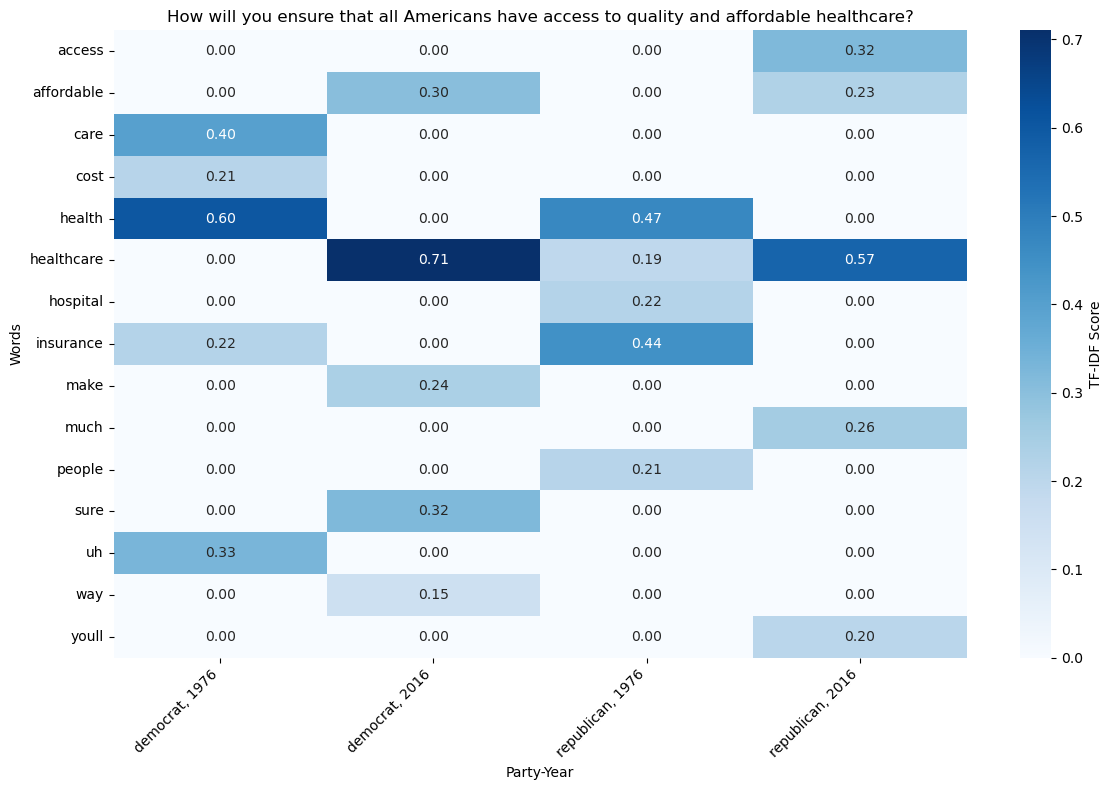

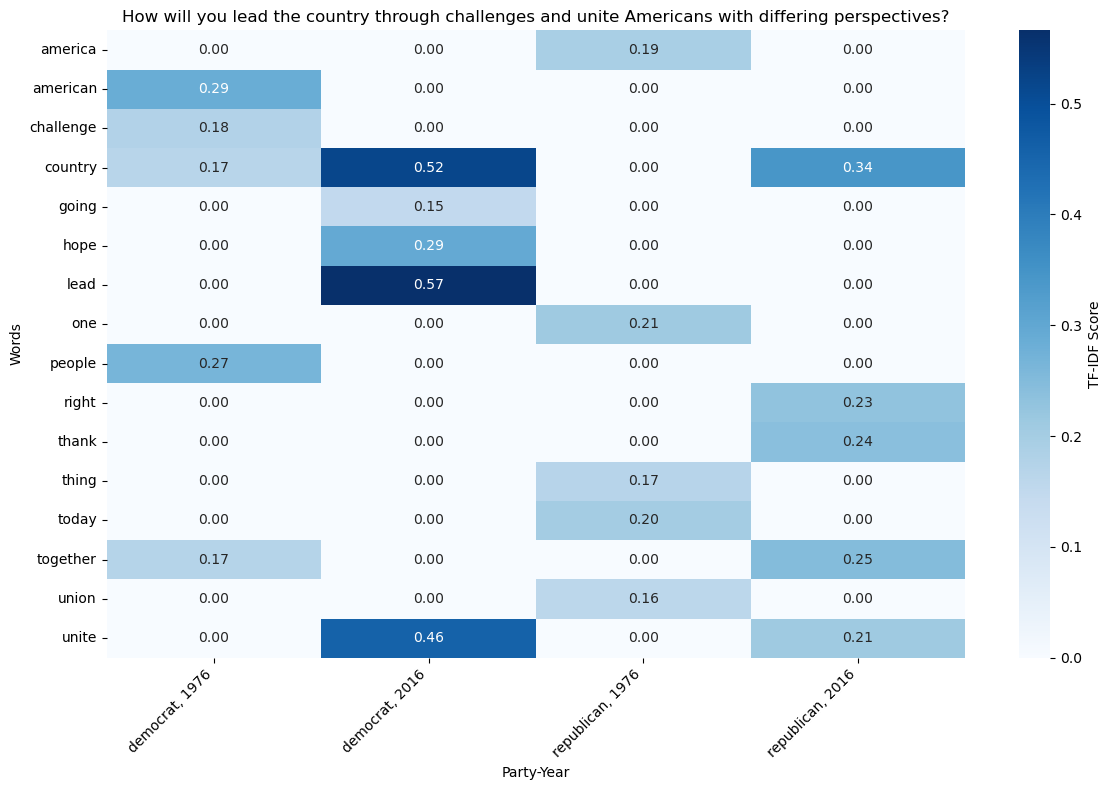

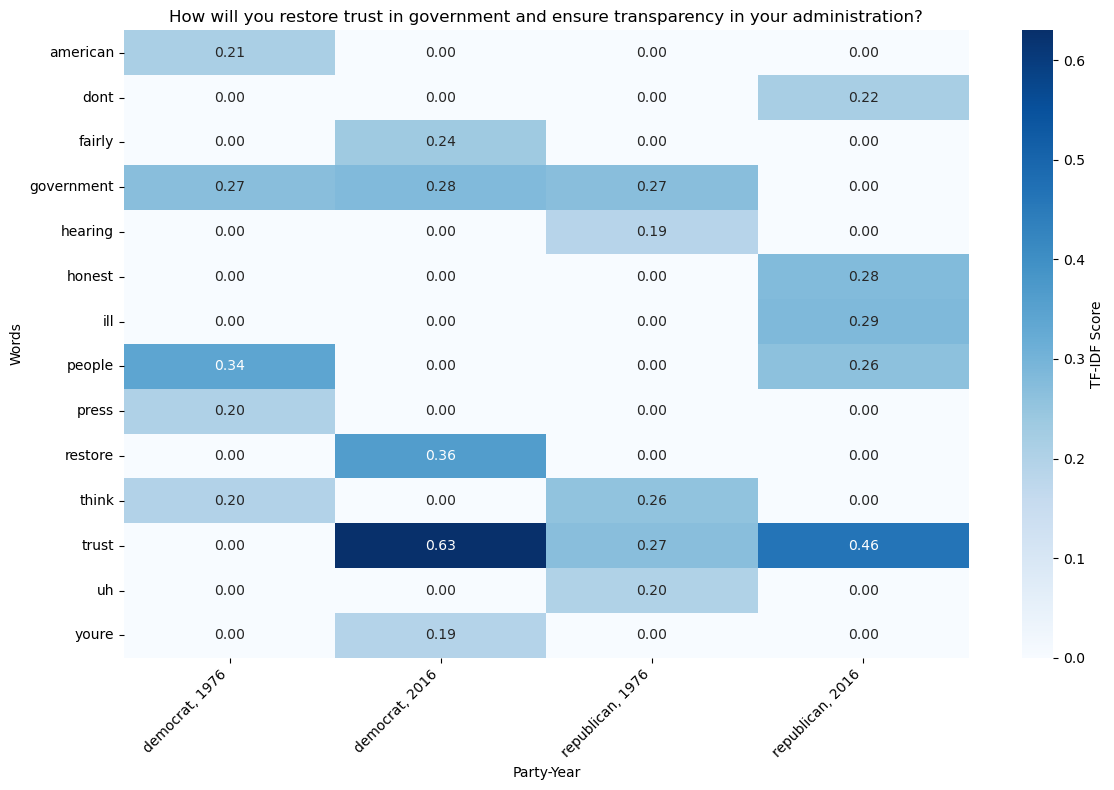

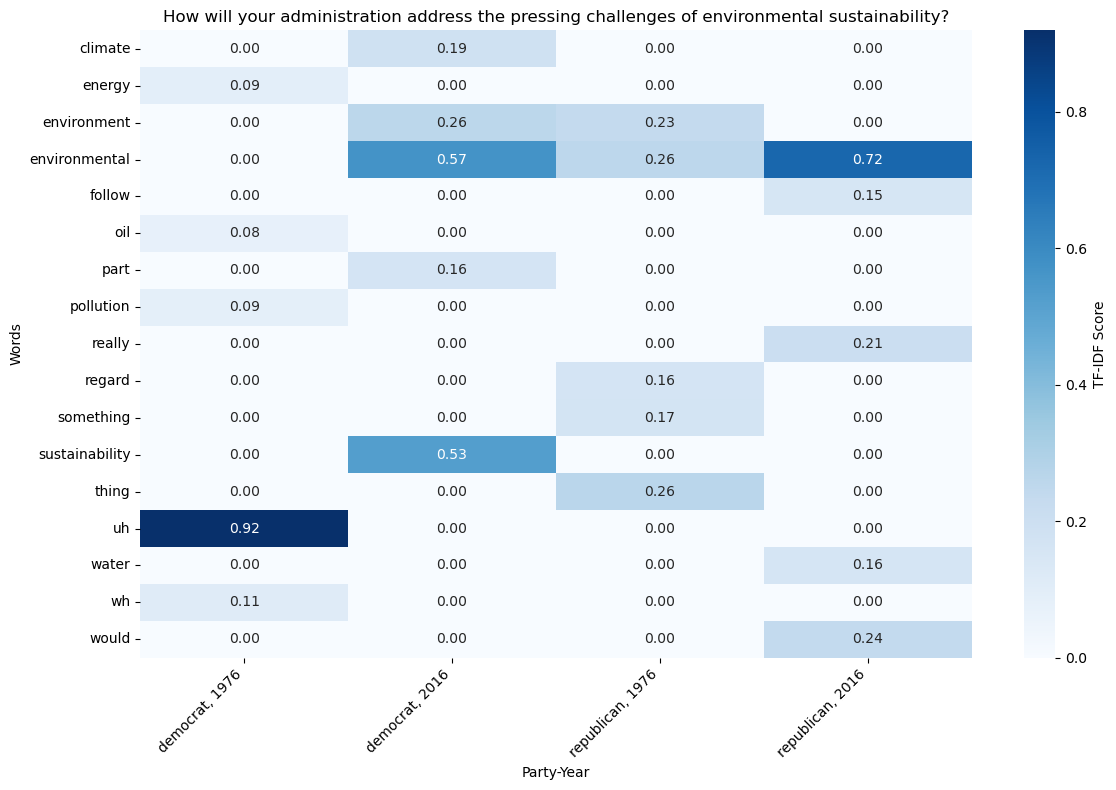

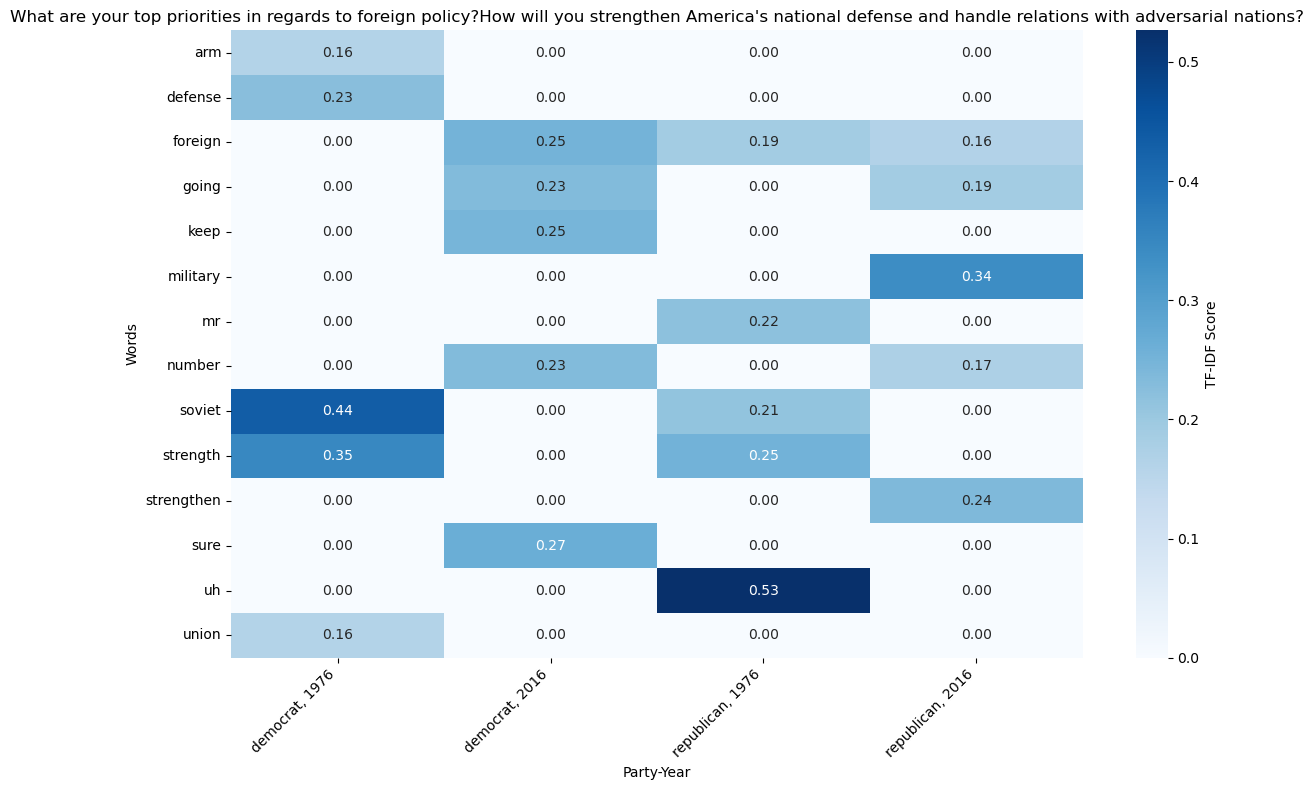

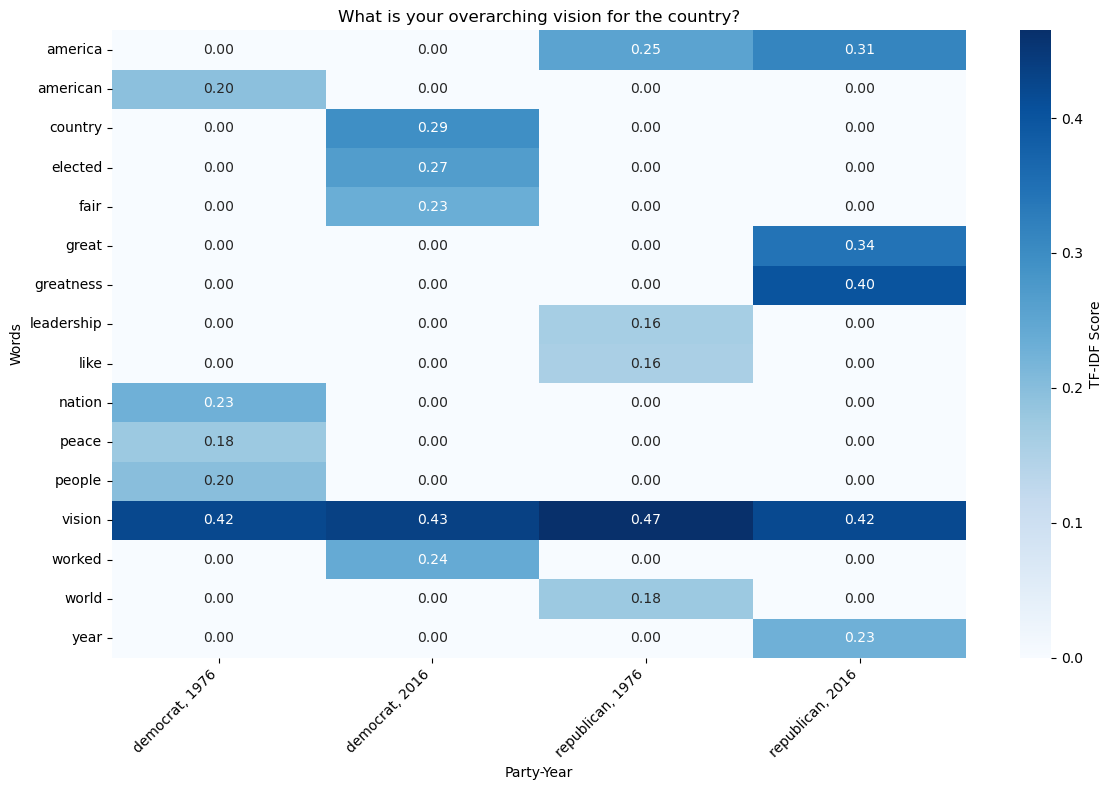

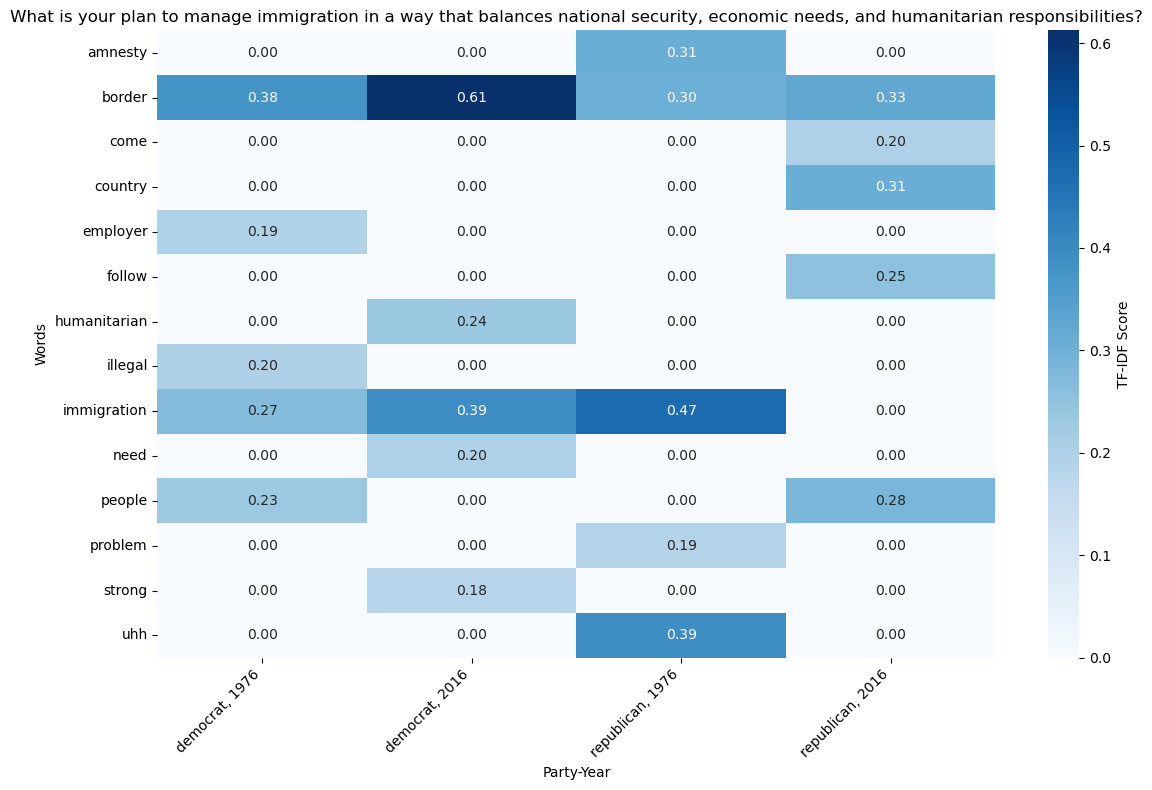

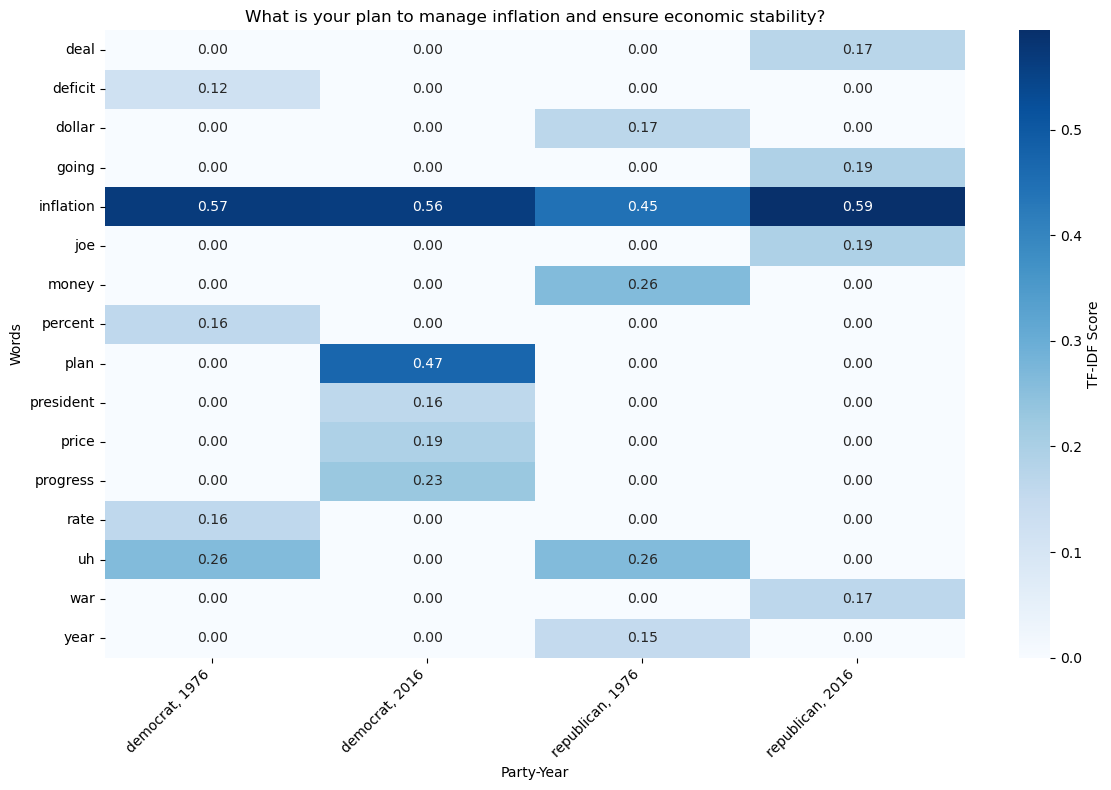

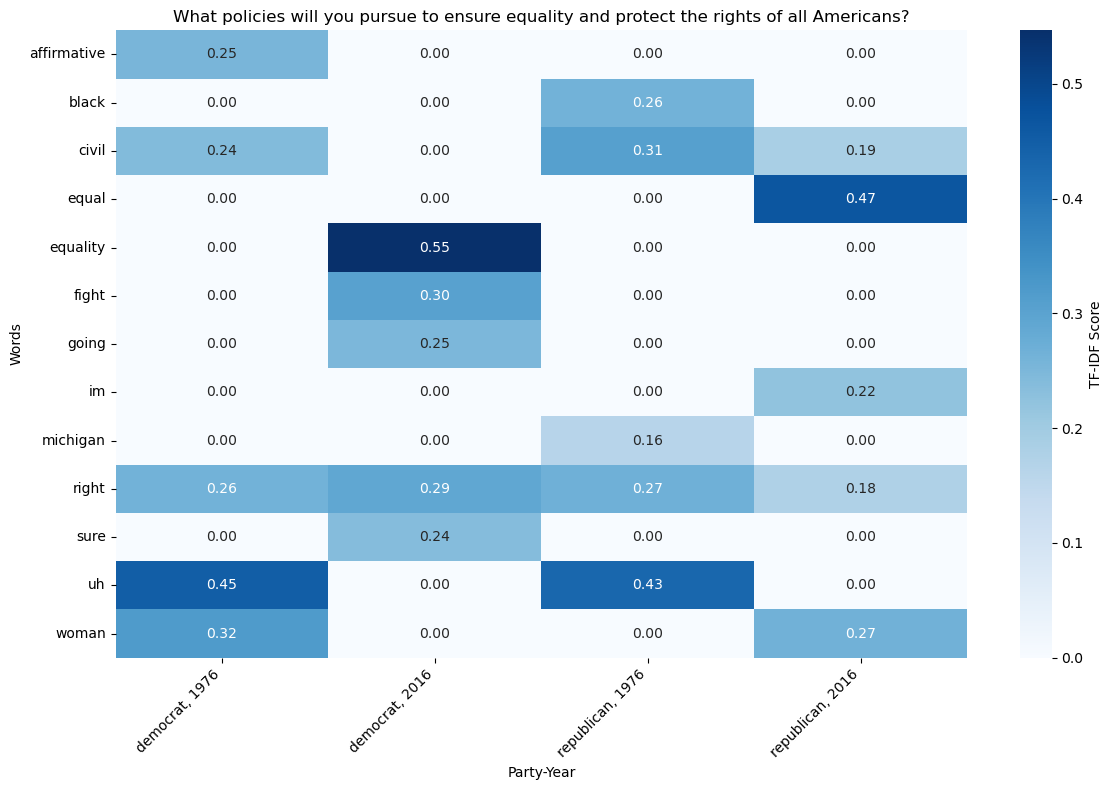

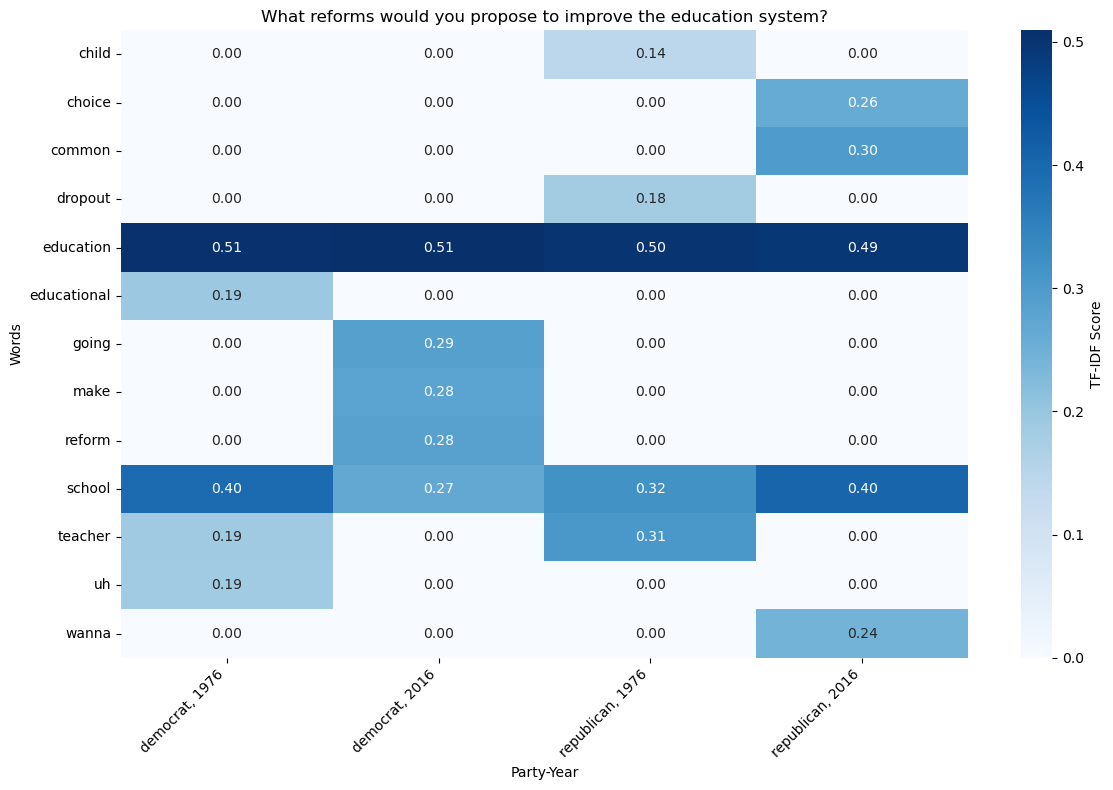

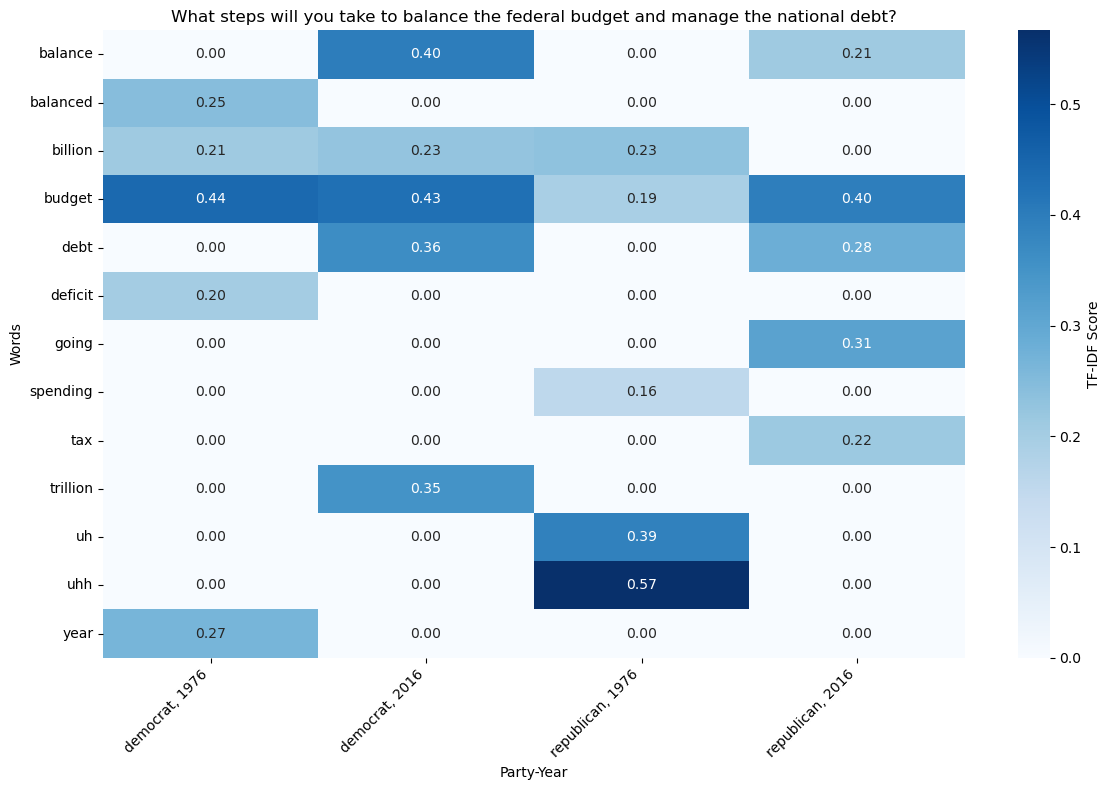

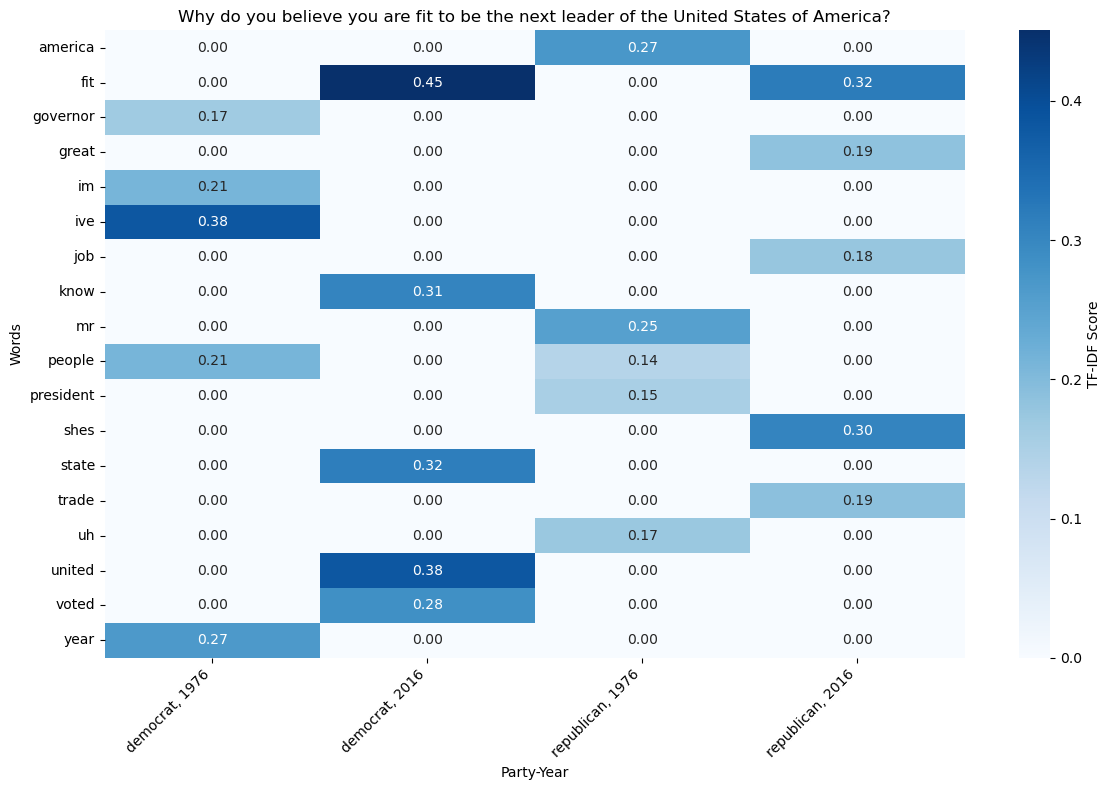

In [9]:
# Plot the heatmap of TF-IDF scores for each question
for question, party_year_data in questions_by_combination.items():
    heatmap_data = []

    for (party, year), words in party_year_data.items():
        for word, score in words.items():
            heatmap_data.append({"Question": question, "Party-Year": f"{party}, {year}", "Word": word, "TF-IDF": score})

    heatmap_df = pd.DataFrame(heatmap_data)

    pivot_table = heatmap_df.pivot_table(index="Word", columns="Party-Year", values="TF-IDF", aggfunc="mean", fill_value=0)

    plt.figure(figsize=(12, 8))
    sns.heatmap(pivot_table, cmap="Blues", annot=True, fmt=".2f", cbar_kws={'label': 'TF-IDF Score'})
    plt.title(f"{question}")
    plt.ylabel("Words")
    plt.xlabel("Party-Year")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()